In [1]:
%matplotlib notebook

import matplotlib
import numpy as np
from numpy.linalg import pinv
import matplotlib.pyplot as plt

In [2]:
ex1data2 = np.genfromtxt ('ex1data2.txt', delimiter=",")

In [3]:
#extract data
X = ex1data2[:,0:2]
y = ex1data2[:,2]
theta = np.zeros(2)

In [4]:
# ================ Part 1: Feature Normalization ================

def featureNormalize(X):
    X2 = X
    mu = np.mean(X2, axis = 0)
    X2 = X - mu
    sigma = np.std(X2, axis = 0)
    X2 = X2 / sigma
    
    return (X2, mu, sigma)

X, mu, sigma = featureNormalize(X);

In [5]:
#add ones to X
X = np.c_[np.ones((len(ex1data2))), X]

In [6]:
def computeCost(X, y, theta):
    m = len(X)
    return np.sum(np.power((np.matmul(X,theta) - y), 2)) / (2 * m)

J = computeCost(X, y, [1, 1, 1]);
print('Cost computed = ' + str(J));

Cost computed = 65591047222.9


In [7]:
# ================ Part 2: Gradient Descent ================

def gradientDescentMulti(X, y, theta, alpha, iterations):
    m = len(X)
    J_history = []
    
    for x in range(iterations):
        hy = np.matmul(X, theta) - y
        theta = theta - alpha * np.matmul(hy, X) / m
        
        J_history.append(computeCost(X, y, theta))
        
    return (theta, J_history)

<IPython.core.display.Javascript object>


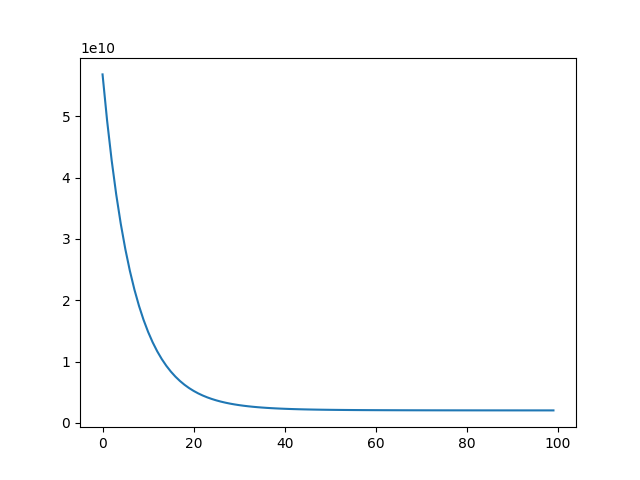

In [8]:
alpha = 0.07;
num_iters = 100;

# Init Theta and Run Gradient Descent 
theta = np.zeros(3)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Plot the convergence graph
plt.plot(range(len(J_history)), J_history)

In [9]:
# Estimate the price of a 1650 sq-ft, 3 br house
price = np.matmul([1,1.650,3],theta)
print(price)

504452.581736


In [10]:
# ================ Part 3: Normal Equations ================
X = ex1data2[:,0:2]
X = np.c_[np.ones((len(ex1data2))), X]
y = ex1data2[:,2]
theta = np.zeros(2)

def normalEqn(X, y):
    return np.matmul(np.matmul(pinv(np.matmul(X.T, X)), X.T), y)

theta = normalEqn(X, y)
print('Theta computed from the normal equations:')
print(theta)

Theta computed from the normal equations:
[ 89597.90954355    139.21067402  -8738.01911255]


In [11]:
# Estimate the price of a 1650 sq-ft, 3 br house
price = np.matmul([1,1650,3], theta)

print('Predicted price of a 1650 sq-ft, 3 br house (using normal equations):\n'+str(price))

Predicted price of a 1650 sq-ft, 3 br house (using normal equations):
293081.464335
